In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing data from local storage 
df1 = pd.read_csv('C:/Users/35001745/Downloads/aircompressor.csv')
df1.head()
#Drop last coloumn as all results are same 
df1.drop(columns = 'acmotor', inplace = True)
df1


,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccx,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve
0,1,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,...,0.711820,0.383773,2.649801,1.213344,1.409218,2.962484,0,0,0,0
1,2,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,...,0.704667,0.450954,2.669423,1.210674,1.379050,2.938135,0,0,0,0
2,3,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,...,0.704828,0.443924,2.772009,1.210612,1.373490,2.991878,0,0,0,0
3,4,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,...,0.726604,0.370457,2.876056,1.213223,1.443234,3.096158,0,0,0,0
4,5,498,1766.035170,38.249154,1.731,306.832132,41.233739,79.130424,2.338877,50.498100,...,0.707785,0.383868,2.849451,1.209216,1.405190,3.059417,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2485,18141.242510,72.206554,6.938,470.274717,66.714857,145.634454,3.667832,105.736828,...,0.559548,0.351149,6.469546,1.054365,1.359977,4.734390,0,0,0,1
996,997,2519,18811.531550,74.163503,7.109,476.563145,64.476072,150.506361,3.057030,101.870016,...,0.556781,0.339553,6.700342,1.056868,1.286475,4.817608,0,0,0,1
997,998,2514,18784.923040,71.763552,7.113,473.831118,60.419933,148.222981,3.567040,113.542220,...,0.555831,0.334793,6.704334,1.056126,1.358090,4.856507,0,0,0,1
998,999,2490,18612.827210,73.097871,7.113,468.394650,62.068962,149.739912,2.692823,116.654248,...,0.553941,0.344867,6.710383,1.051912,1.349688,4.851370,0,0,0,1


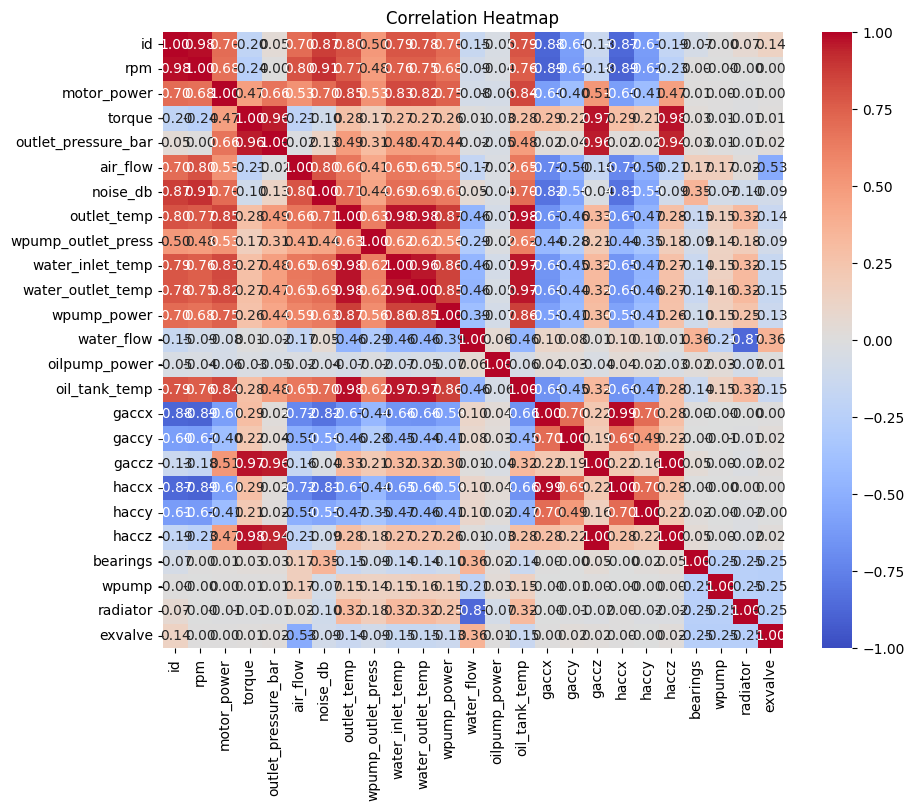

In [3]:
import seaborn as sns
# Select only coloumns with numeric values 
numeric_cols = df1.select_dtypes(include='number')
# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()



C:\Users\35001745\AppData\Local\Temp\ipykernel_18856\725283120.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, orient='h', palette='viridis')


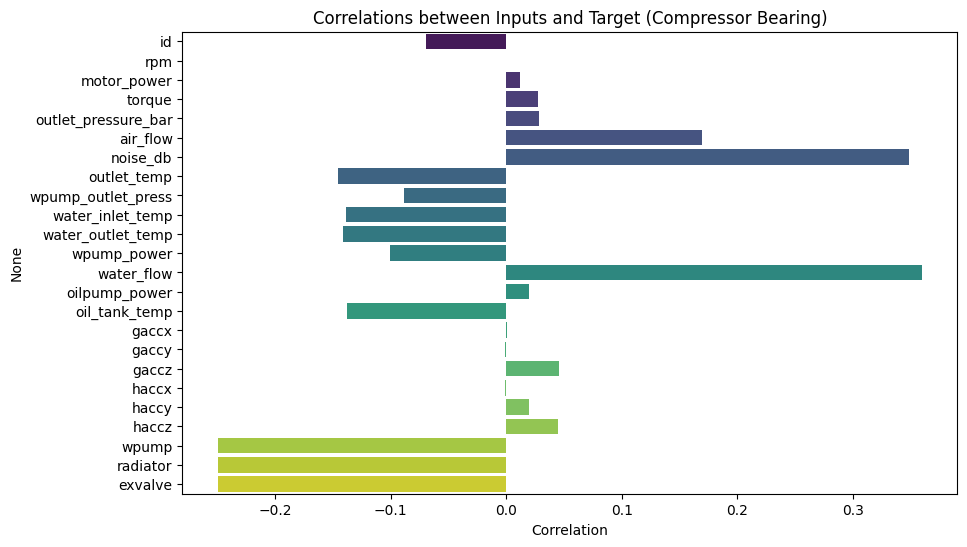

In [4]:
# PLotting the input - Target relations to identify features of importance 
#removing target variable - 'bearings' 
df2 = df1
df3 = df2.drop(columns = 'bearings')
input_features = df3.select_dtypes(include='number').columns


# Specify the target variable
target_variable = 'bearings'

# Calculate correlations between inputs and target
correlations = df3[input_features].corrwith(df1[target_variable])

# Plotting the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, orient='h', palette='viridis')
plt.xlabel('Correlation')
plt.title('Correlations between Inputs and Target (Compressor Bearing)')
plt.show()

Explained Variance Ratios: [0.43287717 0.19874649]


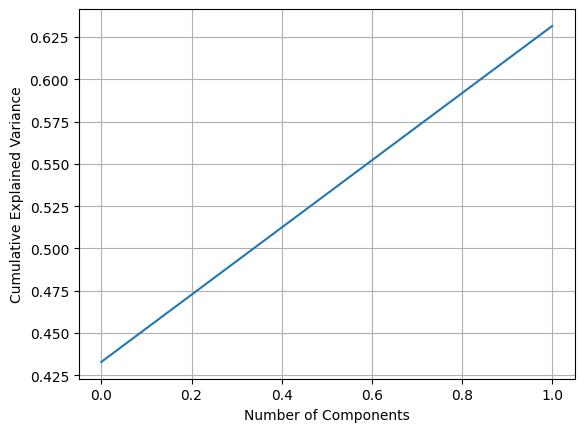

Loadings (PC1, PC2, ...): [[ 0.27443179  0.27262156  0.25679959  0.02951953  0.10355436  0.23448758
   0.25689805  0.289317    0.19481792  0.28549585  0.28477784  0.26016911
  -0.09805685 -0.02023386  0.28663671 -0.25473501 -0.1841343   0.04705793
  -0.25420822 -0.18806     0.0302624  -0.01376178  0.02884818  0.05695908
  -0.03905111]
 [-0.13121501 -0.15783748  0.16298894  0.43602074  0.40386758 -0.13715777
  -0.10582114  0.0997358   0.06883471  0.09782163  0.09789187  0.09588095
  -0.04635836 -0.01742902  0.09992441  0.18721201  0.15684238  0.42979844
   0.18565064  0.14795549  0.43480957 -0.02210114  0.02044521  0.04355986
  -0.00282727]]
          PC1       PC2
0   -6.428899 -1.242677
1   -6.686197 -1.107749
2   -6.827949 -1.051101
3   -6.696559 -0.679096
4   -6.443034 -0.828314
..        ...       ...
995  4.481271  2.866741
996  4.499528  2.650470
997  4.436759  3.042700
998  4.622579  3.107523
999  4.764505  3.689275

[1000 rows x 2 columns]


In [5]:
# Do PCA analysis -- need to examine this part further 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler() 
scaled_data = scaler.fit_transform(df1)

# Apply PCA
pca = PCA(n_components=2)  # Choose number of components
pca.fit(scaled_data)

# Explained variance ratios
print("Explained Variance Ratios:", pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Transform data
pca_data = pca.transform(scaled_data)

loadings = pca.components_
print("Loadings (PC1, PC2, ...):", loadings)

df_pca = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])  # Adjust column names as needed
print(df_pca)

# Total Variance Explained: Together, PC1 and PC2 explain approximately 63.16% (43.29% + 19.87%) of the variance in your dataset.
# The remaining variance (36.84%) is explained by the subsequent principal components if you had more than two components.


In [6]:
# Remove columns with low relations to bearing temperature
# based on relation chart, remove gaccx, gaccy, haccx,oilpump_power. Maintain 'RPM' as its a important paramter to bearing temperatures 
#noise as a parameter not useful for bearings tempt prediction
cols_to_drop = ['gaccy','gaccx','haccx','oilpump_power','noise_db']
df1 = df1.drop(columns = cols_to_drop)

#columns_to_drop = ['B', 'D']
#df = df.drop(columns=columns_to_drop)

In [7]:
df1

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,outlet_temp,wpump_outlet_press,water_inlet_temp,water_outlet_temp,wpump_power,water_flow,oil_tank_temp,gaccz,haccy,haccz,bearings,wpump,radiator,exvalve
0,1,499,1405.842858,27.511708,1.000,308.289879,78.554715,2.960632,43.166392,47.259238,216.610506,59.085059,45.806178,2.649801,1.409218,2.962484,0,0,0,0
1,2,513,1457.370092,31.030115,1.081,307.833736,76.902822,2.536711,47.342143,55.025653,215.397526,59.161939,45.825384,2.669423,1.379050,2.938135,0,0,0,0
2,3,495,1582.249959,33.484653,1.369,307.377593,77.547021,2.112789,49.306593,50.505622,214.160711,59.041939,45.844730,2.772009,1.373490,2.991878,0,0,0,0
3,4,480,1712.466820,36.394475,1.691,306.975248,80.059949,2.087534,46.886933,58.706376,215.816837,59.037176,45.817046,2.876056,1.443234,3.096158,0,0,0,0
4,5,498,1766.035170,38.249154,1.731,306.832132,79.130424,2.338877,50.498100,54.046362,214.685590,59.164154,45.817640,2.849451,1.405190,3.059417,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2485,18141.242510,72.206554,6.938,470.274717,145.634454,3.667832,105.736828,123.061075,225.673251,57.814967,46.568210,6.469546,1.359977,4.734390,0,0,0,1
996,997,2519,18811.531550,74.163503,7.109,476.563145,150.506361,3.057030,101.870016,123.486345,224.762040,57.802073,46.517458,6.700342,1.286475,4.817608,0,0,0,1
997,998,2514,18784.923040,71.763552,7.113,473.831118,148.222981,3.567040,113.542220,128.279705,224.044064,57.782168,46.503602,6.704334,1.358090,4.856507,0,0,0,1
998,999,2490,18612.827210,73.097871,7.113,468.394650,149.739912,2.692823,116.654248,131.776696,228.533520,57.699453,46.533771,6.710383,1.349688,4.851370,0,0,0,1


In [8]:
#feature engineering for parameters relevant to air compressor  
# addition of brake horse power , Heat transfer for water -- More parameters to be added as it becomes available here

df1['flow_gpm'] = df1['air_flow'] * 4.403 
#SG of air: 0.00121 estimate
#eff of comp: 0.75 estimate 
df1['bhp'] = ((df1['flow_gpm'] * (df1['outlet_pressure_bar'] * 33.455) * 0.00121) /3960 )* 0.85   #no suction Pressure info. Ideal case to minus away suction pressure. 
#df1['bhp'].values

#Calculate heat transfer along water HX   
# Specific heat capacity of water: 4.18 kJ/kg 
# assuming data given is in kg/s  -- for flow_water
# delta T is given 
#Q = m * Cp * dT

df1['heat_transfer_KW'] = df1['water_flow']  * 4.18 * (df1['water_outlet_temp'] - df1['water_inlet_temp']) 
df1

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,outlet_temp,wpump_outlet_press,water_inlet_temp,water_outlet_temp,...,gaccz,haccy,haccz,bearings,wpump,radiator,exvalve,flow_gpm,bhp,heat_transfer_KW
0,1,499,1405.842858,27.511708,1.000,308.289879,78.554715,2.960632,43.166392,47.259238,...,2.649801,1.409218,2.962484,0,0,0,0,1357.400336,0.011794,1010.832904
1,2,513,1457.370092,31.030115,1.081,307.833736,76.902822,2.536711,47.342143,55.025653,...,2.669423,1.379050,2.938135,0,0,0,0,1355.391940,0.012731,1900.108185
2,3,495,1582.249959,33.484653,1.369,307.377593,77.547021,2.112789,49.306593,50.505622,...,2.772009,1.373490,2.991878,0,0,0,0,1353.383543,0.016099,295.914801
3,4,480,1712.466820,36.394475,1.691,306.975248,80.059949,2.087534,46.886933,58.706376,...,2.876056,1.443234,3.096158,0,0,0,0,1351.612019,0.019859,2916.747613
4,5,498,1766.035170,38.249154,1.731,306.832132,79.130424,2.338877,50.498100,54.046362,...,2.849451,1.405190,3.059417,0,0,0,0,1350.981877,0.020320,877.507000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2485,18141.242510,72.206554,6.938,470.274717,145.634454,3.667832,105.736828,123.061075,...,6.469546,1.359977,4.734390,0,0,0,1,2070.619579,0.124826,4186.691235
996,997,2519,18811.531550,74.163503,7.109,476.563145,150.506361,3.057030,101.870016,123.486345,...,6.700342,1.286475,4.817608,0,0,0,1,2098.307529,0.129613,5222.779012
997,998,2514,18784.923040,71.763552,7.113,473.831118,148.222981,3.567040,113.542220,128.279705,...,6.704334,1.358090,4.856507,0,0,0,1,2086.278413,0.128942,3559.536949
998,999,2490,18612.827210,73.097871,7.113,468.394650,149.739912,2.692823,116.654248,131.776696,...,6.710383,1.349688,4.851370,0,0,0,1,2062.341644,0.127463,3647.288123


In [24]:
# split the dataset into test - train split dataset 
from sklearn.model_selection import train_test_split
x = df1.drop(columns=['bearings'])  #input variables
y = df1['bearings']  # Target variable
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape 
y_train.shape
df1.shape[1]

23

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define model architecture
def build_model(optimizer):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(22,)), 
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  
    ])
    
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',  #For simple case of 1 or 0 
                  metrics=['accuracy'])
    
    return model

# List of optimizers to compare
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.001),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'Adagrad': tf.keras.optimizers.Adagrad(learning_rate=0.001),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001)
}

# Train models with different optimizers
histories = {}
for name, optimizer in optimizers.items():
    print(f'Training model with {name} optimizer...')
    model = build_model(optimizer)
    history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    histories[name] = history
    print(f'Model with {name} optimizer trained.')
    

Training model with SGD optimizer...


C:\Users\35001745\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model with SGD optimizer trained.
Training model with RMSprop optimizer...


C:\Users\35001745\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model with RMSprop optimizer trained.
Training model with Adagrad optimizer...


C:\Users\35001745\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model with Adagrad optimizer trained.
Training model with Adam optimizer...


C:\Users\35001745\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model with Adam optimizer trained.


In [39]:
print(histories)
histories.keys()

{'SGD': <keras.src.callbacks.history.History object at 0x000001FB6C407CE0>, 'RMSprop': <keras.src.callbacks.history.History object at 0x000001FB6ACCD1C0>, 'Adagrad': <keras.src.callbacks.history.History object at 0x000001FB6C9F1C70>, 'Adam': <keras.src.callbacks.history.History object at 0x000001FB6ACCD910>}


dict_keys(['SGD', 'RMSprop', 'Adagrad', 'Adam'])

In [50]:
# Visualising which optimizer gives the best trained data with least loss 
loss_list = {}
for name, history in histories.items():
    final_loss = history.history['loss'][-1]  # Accessing 'loss' from history object
    lowest_loss = min(history.history['loss'])
    loss_list[name] = lowest_loss
    print(f"Loss of {name} optimizer on trained data: {final_loss:.4f}")

best_optimizer = min(loss_list, key = loss_list.get)
print(best_optimizer)


Loss of SGD optimizer on trained data: 0.4883
Loss of RMSprop optimizer on trained data: 0.3475
Loss of Adagrad optimizer on trained data: 0.7743
Loss of Adam optimizer on trained data: 0.1563
Adam


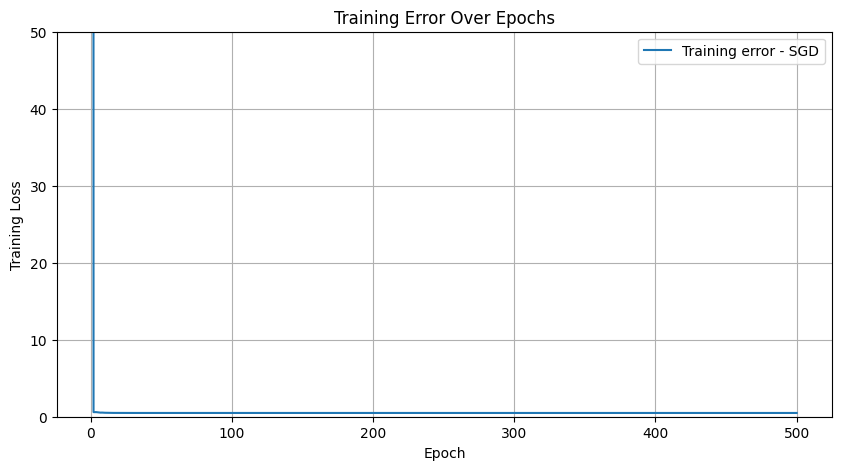

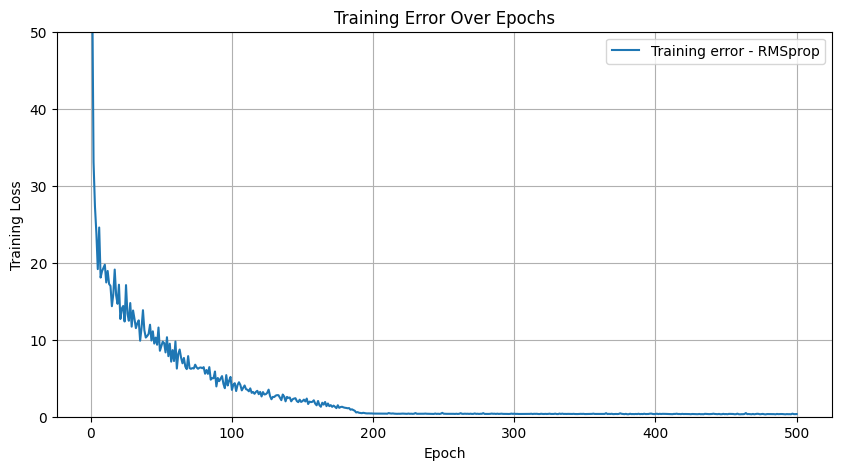

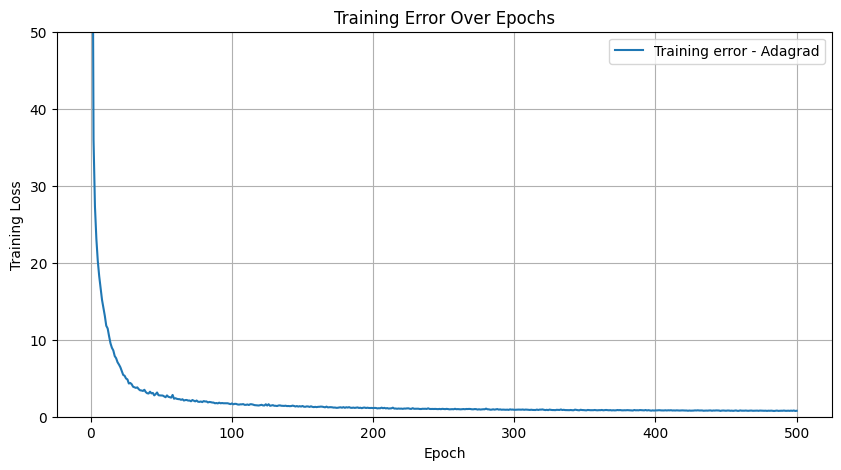

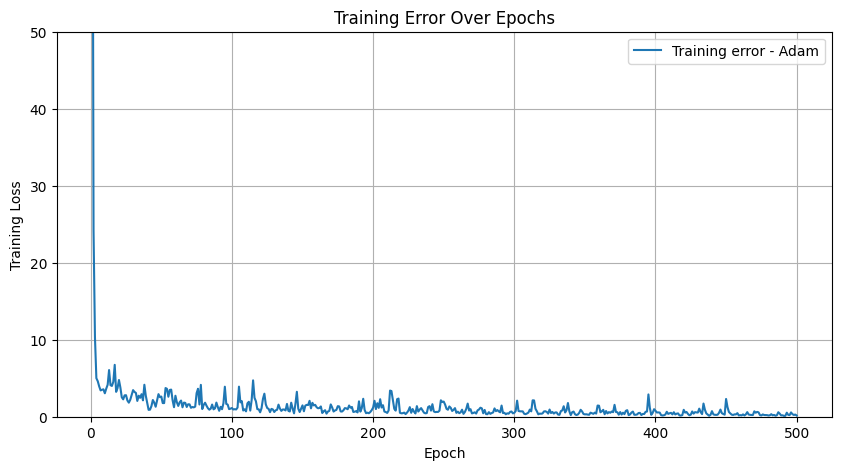

In [57]:
#Plot loss - epochs curve for all optimizers  
def plot_curve(histories):
    for name,training_res  in histories.items():
        plt.figure(figsize=(10, 5))
        training_error = training_res.history['loss']
        epochs = range(1, len(training_error) + 1)
        plt.plot(epochs, training_error, label=f'Training error - {name}')
        plt.xlabel('Epoch')
        plt.ylabel('Training Loss')
        plt.title('Training Error Over Epochs')
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.ylim(0, 50)  # Adjust the y-axis limit if necessary
        plt.show()

plot_curve(histories)

In [54]:
# Define model architecture

model = Sequential([
    Dense(64, activation='relu', input_shape=(22,)), 
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  
])

# Compile model with best optimizer and learning rate
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=best_optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val), verbose=0)




C:\Users\35001745\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


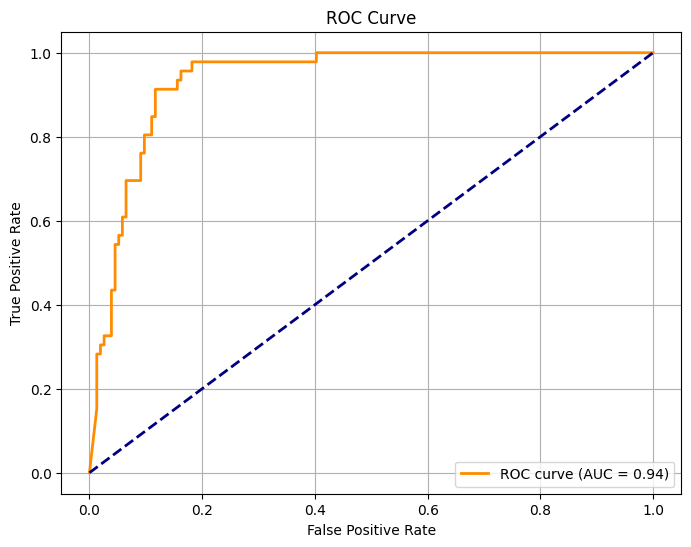

In [58]:
# Predict probabilities for ROC curve
from sklearn.metrics import roc_curve, auc


y_pred = model.predict(X_val)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Accuracy: 0.80
Precision: 0.54
Recall: 0.98
Confusion Matrix:
[[115  39]
 [  1  45]]


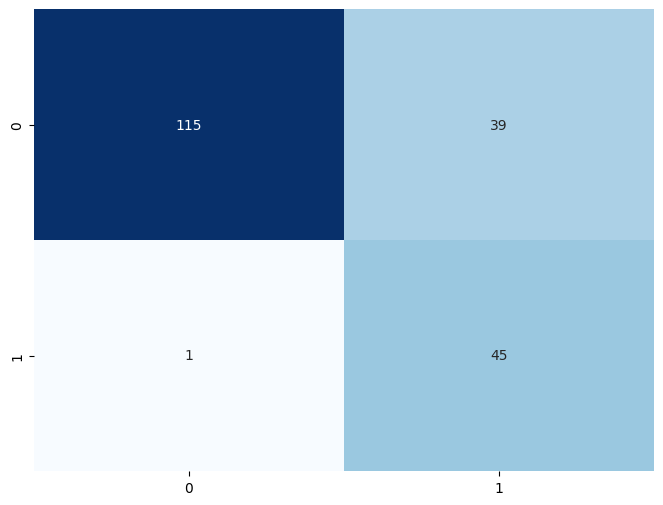

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


y_pred = (y_pred > 0.5).astype(int)  #convert to binary 0 or 1. " >0.5 to True/False. astype(int) converts to 1 or 0" 

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('Confusion Matrix:')
print(cm)

